Notebook to compute the correlation scores between different signatures and our own data as shown in Figure S2.

In [1]:
library(tidyverse)
library(Seurat)
library(patchwork)
library(corrplot)
library(ComplexHeatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.11.1-CAPI-1.17.1
and GEOS at installation 3.10.3-CAPI-1.16.1differ”
Attaching SeuratObject

Attaching sp

corrplot 0.92 loaded

Loading required package: grid

ComplexHeatmap version 2.12.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioi

In [2]:
#Define input directory

    data_dir <- "../ZenodoRepo/"

#Load full object from data repo:

    INTepi <- readRDS(paste0(data_dir,"INTepi.rds"))
    INTepi

In [3]:
#Load subsampled object

    downsampled_INTepi <- readRDS("data/downsampled_INTepi.rds")

# Defining the literature signatures

In the cases where the genes present belonged to a different organism other than M. musculus (i.e. Human data) we used biomart to find the relevant orthologs

#Data used came straight from other publications supplementary materials or was manually captured from their analyses

    #From datasets
    d41598_2018_37301_MOESM2_ESM8 <- read_csv("data/published_signatures/41598_2018_37301_MOESM2_ESM8.csv")
    d1_s2_0_S193459091100110X_mmc47 <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc47.csv", skip = 4)
    d1_s2_0_S193459091100110X_mmc26_LGR5 <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc26__LGR5.csv",
                                                    skip = 4)
    d1_s2_0_S193459091100110X_mmc26_Prolif <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc26__Prolif.csv", 
                                                    skip = 4)
    d1_s2_0_S193459091100110X_mmc26_ISC <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc26__ISC.csv",
                                                    skip = 4)
    d41586_2015_BFnature15382_MOESM27_ESM5 <- read_csv("data/published_signatures/41586_2015_BFnature15382_MOESM27_ESM5.csv")
    d41592_2021_1391_MOESM7_ESM4 <- read_csv("data/published_signatures/41592_2021_1391_MOESM7_ESM4.csv")
    d1_s2_0_S1934590917304538_mmc21 <- read_csv("data/published_signatures/1-s2.0-S1934590917304538-mmc21.csv",
                                                skip = 3)
    d41586_2019_1154_MOESM6_ESM3_SSC2c <- read_csv("data/published_signatures/41586_2019_1154_MOESM6_ESM3__SSC2c.csv")
    d41586_2019_1154_MOESM6_ESM3_SSC2b <- read_csv("data/published_signatures/41586_2019_1154_MOESM6_ESM3__SSC2b.csv")
    d41586_2019_1154_MOESM6_ESM3_SSC2a <- read_csv("data/published_signatures/41586_2019_1154_MOESM6_ESM3__SSC2a.csv")
    d41586_2019_1154_MOESM4_ESM2_clust18SSC2 <- read_csv("data/published_signatures/41586_2019_1154_MOESM4_ESM2__clust18SSC2.csv")
    d41586_2019_1154_MOESM4_ESM2_clust17SSC1 <- read_csv("data/published_signatures/41586_2019_1154_MOESM4_ESM2__clust17SSC1.csv")
    d41588_2017_BFng3818_MOESM20_ESM2_stemTA <- read_csv("data/published_signatures/41588_2017_BFng3818_MOESM20_ESM2_stemTA.csv")
    d41588_2017_BFng3818_MOESM21_ESM1_DEtumour <- read_csv("data/published_signatures/41588_2017_BFng3818_MOESM21_ESM1_DEtumour.csv")
    d1_s2_0_S0092867421009454_mmc43_stemTA <- read_csv("data/published_signatures/1-s2.0-S0092867421009454-mmc43_stemTA.csv")
    d43018_2022_402_MOESM2_ESM_MEX3A <- read_csv("data/published_signatures/43018_2022_402_MOESM2_ESM.csv", skip=2)
    d41586_2022_5402_MOESM9_ESM <- read_csv("data/published_signatures/41586_2022_5402_MOESM9_ESM.csv", skip = 1)

    #Manual signatures from literature
    g_FetalHAN20 <- c("Sprr1a", "Msln","Ly6a","Spp1", "Krt4")
    g_RevscHAN20 <- c("Cxadr","Basp1","Anxa1","Clu")
    g_IscHAN20 <- c("Gkn3","Ascl2","Axin2","Olfm4","Lgr5")
    g_YapHAN20 <- c("Ankrd1", "Ccn1","Ccn2","Axl","Msln","Plaur")
    g_WntHAN20 <- c("Axin2","Apcdd1","Nkd1","Tnfrsf19","Smoc2","Cd44","Wnt6")
    g_IscGREGORIEFF15 <- c("Lgr5","Aqp4","Axin2","Ephb3","Sox9","Sox4","Defa5","Wnt3","Spdef","Atoh1")#Atoh1 is Math1
    g_IscGREGORIEFF15 <- c("Lgr5","Aqp4","Axin2","Ephb3","Sox9","Sox4","Wnt3","Spdef","Atoh1")#Defa5 isn't present
    g_RepGREGORIEFF15 <- c("Clu","Areg","Cxcl16","Il13","Ly6a","Tnfrsf12a", "Il1rn","Hbegf","Msln")#Tnfrsf12a is tweakR proper name in mouse
    g_RepGREGORIEFF15 <- c("Clu","Areg","Cxcl16","Ly6a","Tnfrsf12a", "Il1rn","Hbegf","Msln")#Il13 isn't present
    g_IscLI17 <- c("EPHB2", "SOX9", "ASCL2", "OLFM4", "CD44", "PROM1", "PTK7", 
                "LGR5", "LATS2", "CXCL2", "MLLT10", "METTL3", "EZH2", "VEGFA", 
                "EGFR","GPSM2", "DNMT3A", "HES1", "MYC", "RNF43", "AXIN2", "CDK6",
                "PTPR0", "RGMB", "CDCA7", "AQP1", "PTPLAD1", "DPP4", "CFTR", 
                "TSPAN6", "FERMT1", "UGT8", "LRIG1", "CA2", "STMN1", "BMI1", 
                "SMOC2", "ETS2", "GPX2", "FAM84A", "PTPRG", "SLC12A2")
    g_StemcorrLI17 <- c("H2AFZ","SRSF2","SMG1","STMN1","GPX2","TUBB4B","RPL14","CTD-2031P19.4")
    g_TumourLI17 <- c("HSPA8", "HSP90AA1", "HSPH1", "LYZ", "RP11-1143G9.4", "SAT1",
                    "ANKRD10", "HNRNPH1", "S100A11", "S100P")
    g_WntLI17 <- c("WNT3", "FZD3", "APC", "CTNNB1", "TCF7", "LEF1", "AXIN2",
                "AXIN1", "LGR5", "MYC", "CCND1", "BIRC5", "ASCL2", "MMP7",
                "VEGFA", "RNF43", "GPX2", "OLFM4")
    g_TgfbLI17 <- c("PMEPA1", "TGIF1", "LAMC2", "ITGA2", "EPHB2", "CKS2", "CENPF",
                    "CDC42SE1", "BIRC5", "BHLHE40", "BARD1", "ASPM", "VEGFB", 
                    "VEGFA", "IGFBP31", "CDH11", "INHBA", "TAGLN", "CTGF", "ACTA2",
                    "COL18A1", "COL6A3", "COL1A2", "COL1A1", "MMP2", "TIMP1",
                    "PLAUR", "IFNG", "ADAM19", "IL1RN", "IL1A", "CSF1R", "HSPG2",
                    "SERPINE1", "TGFB3")
    g_ProgenstemDALERBA11 <- c("LGR5", "ASCL2", "RGMB", "PTPR0")
    g_ImmatureDALERBA11 <- c("OLFM4", "LRIG1", "CFTR", "TSPAN6", "AQP1")
    g_CancerDALERBA11 <- c("MYC", "AXIN2", "EZH2")
    g_ProlifDALERBA11 <- c("MKI67", "TOP2A", "BIRC5")

    #This publication's curated signatures
    g_OWNsig_CSC <- c("Lgr5", "Pla2g2a", "Lrig1", "Smoc2", "Aqp5", "Agr2")
    g_OWNsig_proCSC <- c("Cenpa", "Hmgb2", "Birc5", "Tuba1b", "Ube2c", "Rrm2", 
                        "Hells", "Cdk1", "Ephb2")
    g_OWNsig_revCSC <- c("Anxa1", "Ly6a", "Clu", "Basp1",  # Revival stem 
                        "Areg", "Ccn1", "Ccn2", "Ankrd1",  # YAP Targets
                        "Ctla2a", "Pmepa1", "Marcksl1", "Cldn4", "F3", "Ecm1", 
                        "Sox9", "Cd44", "Itga2", "Fn1") # Broader )
    g_OWNsig_proliferation <- c("Stmn1", "Ccnd1", "Mki67", "Ccnb1")
    #DE genes from this publication's clusters
    g_OWNdeclust_CSC <- FindMarkers(INTepi21_velo, assay = "RNA",
                        group.by = "curatedCLUST", ident.1 = "Stem",
                        test.use = "wilcox", min.pct = 0.1, only.pos = FALSE,
                        random.seed = 12,
                        verbose = TRUE
                        )
    g_OWNdeclust_stem <- g_OWNdeclust_stem %>%
                            filter(p_val_adj < 0.01 & avg_log2FC>0.25) %>% 
                            slice_max(avg_log2FC, n=24)
    g_OWNdeclust_stem <- rownames(g_OWNdeclust_stem)
    g_OWNdeclust_stemO <- FindMarkers(INTepi21_velo, assay = "RNA",
                            group.by = "curatedCLUST", ident.1 = "Stem (Oncogene)",
                            test.use = "wilcox", min.pct = 0.1, only.pos = FALSE,
                            random.seed = 12,
                            verbose = TRUE
                        )
    g_OWNdeclust_stemO <- g_OWNdeclust_stemO %>%
                            filter(p_val_adj < 0.01 & avg_log2FC>0.25) %>% 
                            slice_max(avg_log2FC, n=24)
    g_OWNdeclust_stemO <- rownames(g_OWNdeclust_stemO)
    g_OWNdeclust_stemS <- FindMarkers(INTepi21_velo, assay = "RNA",
                            group.by = "curatedCLUST", ident.1 = "Stem (Stroma)",
                            test.use = "wilcox", min.pct = 0.1, only.pos = FALSE,
                            random.seed = 12,
                            verbose = TRUE
                        )
    g_OWNdeclust_stemS <- g_OWNdeclust_stemS %>%
                            filter(p_val_adj < 0.01 & avg_log2FC>0.25) %>% 
                            slice_max(avg_log2FC, n=24)
    g_OWNdeclust_stemS <- rownames(g_OWNdeclust_stemS)

Then, for each signture/set of signatures, we used UCell's AddModuleScore function (with default parameters) to compute a per cell score based on the RNA assay of the integrated Seurat object. This function accesses and adds a new metadata layer to a Seurat object automatically

    SeuratObject <- UCell::AddModuleScore_UCell(
        obj = INTepi, features = list_of_features, # A named list of lists can be passed
        assay = "RNA"
    )

The downsampled object already contains these signature scores within its metadata

# Computing correlations

,FetalHAN20_UCell,RevscHAN20_UCell,IscHAN20_UCell,YapHAN20_UCell,WntHAN20_UCell,IscGREGORIEFF15_UCell,RepGREGORIEFF15_UCell,YapGREGORIEFF15_UCell,hEphb2MERLOS11_UCell,hLgr5MERLOS11_UCell,⋯,LGR5munoz_ALVAREZ22_UCell,FETALmustata_ALVAREZ22_UCell,MEX3Abarriga_ALVAREZ22_UCell,LGR5short_ALVAREZ22_UCell,MEX3A_ALVAREZ22_UCell,LGR5_ALVAREZ22_UCell,YAPsign_ALVAREZ22_UCell,hEpiHrCANELLAS22_UCell,hWntMORRAL20_UCell,hYapWANG18_UCell
FetalHAN20_UCell,1.00000000,0.60887093,-0.35029351,0.5674233999,0.044928558,0.21589940,0.7083089438,0.61409250,0.0608181779,0.22148914,⋯,0.065073971,0.800103772,0.37454638,-0.368961602,0.582104408,-0.24582625,0.28937474,0.60361343,-0.02944621,0.486333244
RevscHAN20_UCell,0.60887093,1.00000000,-0.30946960,0.6901780859,0.033272807,0.51831308,0.8404647936,0.47192091,0.1111410149,0.42571252,⋯,0.067909347,0.744876231,0.48210386,-0.357070321,0.781673930,-0.23486219,0.54966316,0.65483357,-0.01322097,0.696209771
IscHAN20_UCell,-0.35029351,-0.30946960,1.00000000,-0.2842262620,0.397808503,0.18443755,-0.3344222013,-0.37456746,0.2793059487,0.12029381,⋯,0.309517077,-0.378633673,-0.07733008,0.896930978,-0.245209750,0.23730948,-0.10563543,-0.33946037,0.45103393,-0.267613744
YapHAN20_UCell,0.56742340,0.69017809,-0.28422626,1.0000000000,-0.013041209,0.29678827,0.7043262344,0.53656131,0.0054542481,0.25141943,⋯,0.015976365,0.571287070,0.35901512,-0.308301839,0.648093164,-0.18634661,0.66900604,0.59840111,-0.04236621,0.650105209
WntHAN20_UCell,0.04492856,0.03327281,0.39780850,-0.0130412089,1.000000000,0.47211185,-0.0226825488,-0.07028556,0.7265782324,0.51253578,⋯,0.654336575,-0.008783842,0.44532112,0.355203602,0.167081473,-0.03293120,0.12308855,0.12958354,0.53388871,0.150039129
IscGREGORIEFF15_UCell,0.21589940,0.51831308,0.18443755,0.2967882726,0.472111853,1.00000000,0.3511096199,0.02632818,0.4479031348,0.71003058,⋯,0.528940522,0.247252178,0.49299606,0.150990956,0.546903501,-0.20770039,0.35809484,0.32487723,0.43546048,0.498137200
RepGREGORIEFF15_UCell,0.70830894,0.84046479,-0.33442220,0.7043262344,-0.022682549,0.35110962,1.0000000000,0.57932866,-0.0003967108,0.28308776,⋯,-0.022073179,0.719256900,0.42474630,-0.388949743,0.744219776,-0.27310978,0.37648509,0.73964633,-0.09452408,0.650034622
YapGREGORIEFF15_UCell,0.61409250,0.47192091,-0.37456746,0.5365613141,-0.070285557,0.02632818,0.5793286574,1.00000000,-0.0643913169,0.07101608,⋯,-0.083847019,0.597593527,0.14048976,-0.360903970,0.477058955,-0.26101086,0.18386894,0.64000069,-0.17649361,0.397526577
hEphb2MERLOS11_UCell,0.06081818,0.11114101,0.27930595,0.0054542481,0.726578232,0.44790313,-0.0003967108,-0.06439132,1.0000000000,0.65264627,⋯,0.729173569,0.002802743,0.57230988,0.314907150,0.109064799,0.21995920,0.14921117,0.13487594,0.49853350,0.177532345
hLgr5MERLOS11_UCell,0.22148914,0.42571252,0.12029381,0.2514194320,0.512535777,0.71003058,0.2830877552,0.07101608,0.6526462658,1.00000000,⋯,0.646487816,0.195864690,0.64064165,0.098456579,0.485441448,-0.20348910,0.31033770,0.39178922,0.50661264,0.483508649


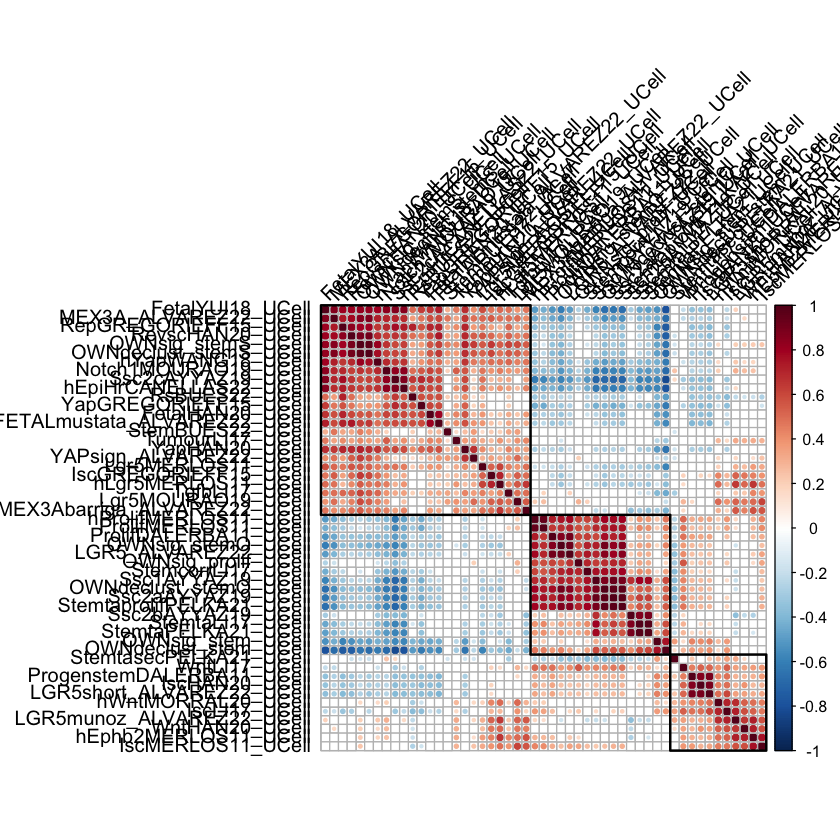

In [4]:
#Compute correlations using the downsampled object

d_corrhtmp <- downsampled_INTepi@meta.data %>% 
    dplyr::select(
        "curatedCLUST",
        "FetalHAN20_UCell","RevscHAN20_UCell","IscHAN20_UCell",
        "YapHAN20_UCell","WntHAN20_UCell","IscGREGORIEFF15_UCell",
        "RepGREGORIEFF15_UCell","YapGREGORIEFF15_UCell",
        "hEphb2MERLOS11_UCell","hLgr5MERLOS11_UCell",
        "hProlifMERLOS11_UCell","IscMERLOS11_UCell","Lgr5MERLOS11_UCell",
        "ProlifMERLOS11_UCell","FetalYUI18_UCell","Ssc1AYYAZ19_UCell",
        "Ssc2AYYAZ19_UCell","Ssc2aAYYAZ19_UCell","Ssc2bAYYAZ19_UCell",       
        "Ssc2cAYYAZ19_UCell","StemBUES22_UCell","RsBUES22_UCell",
        "Notch1MOURAO19_UCell","Lgr5MOURAO19_UCell","IscLI17_UCell",
        "StemcorrLI17_UCell","TumourLI17_UCell","WntLI17_UCell",
        "TgfbLI17_UCell","StemtaLI17_UCell","ProgenstemDALERBA11_UCell",
        "ImmatureDALERBA11_UCell","CancerDALERBA11_UCell",
        "ProlifDALERBA11_UCell","StemtaPELKA21_UCell",
        "StemtasecPELKA21_UCell","StemtaprolifPELKA21_UCell",
        "OWNwntreceptors_UCell","OWNsig_stem_UCell","OWNsig_stemO_UCell",
        "OWNsig_stemS_UCell","OWNsig_prolif_UCell",
        "OWNdeclust_stem_UCell","OWNdeclust_stemO_UCell","OWNdeclust_stemS_UCell",
        "LGR5munoz_ALVAREZ22_UCell","FETALmustata_ALVAREZ22_UCell",
        "MEX3Abarriga_ALVAREZ22_UCell","LGR5short_ALVAREZ22_UCell",
        "MEX3A_ALVAREZ22_UCell","LGR5_ALVAREZ22_UCell","YAPsign_ALVAREZ22_UCell",
        "hEpiHrCANELLAS22_UCell","hWntMORRAL20_UCell","hYapWANG18_UCell"
    )

#Compute correlation matrix on stem and TA clusters
d_corrhtmp_stem_filt <- d_corrhtmp %>% 
filter(curatedCLUST %in% 
            c("CSC", "proCSC",
            "revCSC", "TA 1","TA 2")
        ) %>%
dplyr::select(!c( #These signatures show a low SD of correlation values across all cells (<0.24) and thus were removed from the heatmap
        Ssc2AYYAZ19_UCell,
        curatedCLUST, 
        ImmatureDALERBA11_UCell,
        CancerDALERBA11_UCell,
        OWNwntreceptors_UCell)) %>% 
scale() #Scale correlations

dTest_corrhtmp_stem_filt <- cor.mtest(d_corrhtmp_stem_filt, method = "pearson", conf.level=0.95)
d_corrhtmp_stem_filt <- cor(d_corrhtmp_stem_filt, method = "pearson")
d_corrhtmp_stem_filt

#Plot correlation matrix
corrplot::corrplot(d_corrhtmp_stem_filt, type = "full", 
    order = "hclust", hclust.method = "complete",
    tl.col = "black", tl.srt = 45,
    addrect = 3, rect.col = "black", rect.lwd = 2,
    col = rev(corrplot::COL2("RdBu")),
    p.mat = dTest_corrhtmp_stem_filt$p, sig.level = 0.05, insig = "blank"
    )